In [8]:
from platform import python_version

print(python_version())

3.7.6


In [9]:
import os
import zipfile 
from skimage.io import imread_collection
import matplotlib.pyplot as plt

In [3]:
#unziping mens cloths zip file 
with zipfile.ZipFile("male-clothing.zip","r") as zip_ref:
    zip_ref.extractall()

In [10]:
print('getcwd:      ', os.getcwd())

getcwd:       /Users/henrybiko


In [11]:
#reading folder
men = "/Users/henrybiko/Downloads/Man's Clothing - n03746330/*.JPEG"
#create image collection
men_cloths = imread_collection(men)
print(f"Number of men clothing pictures: {len(men_cloths)}.")

Number of men clothing pictures: 1242.


In [12]:
#unziping womens cloths zip file 
with zipfile.ZipFile("female-clothing.zip","r") as zip_ref:
    zip_ref.extractall()

In [13]:
#reading folder
women = "/Users/henrybiko/Downloads/Woman's Clothing - n04596852/*.JPEG"
#create image collection
women_cloths= imread_collection(women)
print(f"Number of men clothing pictures: {len(women_cloths)}.")

Number of men clothing pictures: 1270.


In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install keras==2.3.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tensorflow==2.1

     |████████████████████████████████| 120.8 MB 619 kB/s eta 0:00:01    |█████▊                          | 21.7 MB 180 kB/s eta 0:09:09     |████████▌                       | 31.9 MB 632 kB/s eta 0:02:21     |█████████▍                      | 35.5 MB 355 kB/s eta 0:04:01     |█████████▌                      | 35.7 MB 372 kB/s eta 0:03:49     |█████████▌                      | 35.8 MB 372 kB/s eta 0:03:49     |█████████▋                      | 36.2 MB 345 kB/s eta 0:04:06     |████████████                    | 45.3 MB 493 kB/s eta 0:02:33     |██████████████▍                 | 54.5 MB 626 kB/s eta 0:01:46     |████████████████▋               | 62.5 MB 763 kB/s eta 0:01:17     |█████████████████▍              | 65.5 MB 508 kB/s eta 0:01:49     |█████████████████▍              | 65.8 MB 531 kB/s eta 0:01:44     |████████████████████            | 75.1 MB 630 kB/s eta 0:01:13     |█████████████████████▎          | 80.4 MB 625 kB/s eta 0:01:05     |███████████████████████▌        | 88.9 MB 

In [1]:
# import libraries
%matplotlib inline
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import applications

Using TensorFlow backend.


In [2]:
from tensorflow.keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import keras

In [3]:
real_model = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))

In [4]:
#extracting model layesr
real_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
def process(data):
    image = load_img(data, target_size=(224, 224))
    #convert image to np array
    image = img_to_array(image)
    #reshaping data
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    #preprocess for model
    image = preprocess_input(image)
    #feature extraction using the vgg16 model
    features = orig_model.predict(image) 
    return features

In [14]:
#extract men cloth  features
m = []
for i in men:
    m.append(process(i))

IsADirectoryError: [Errno 21] Is a directory: '/'

In [58]:
#extract women cloth features
w= []
for k in women:
    f.append(process(k))

IsADirectoryError: [Errno 21] Is a directory: '/'

In [ ]:
#preping the data from extraction above
men= np.asarray(m)
women = np.asarray(w)
men= men.reshape(len(men), 7, 7, 512) 
women = women.reshape(len(women), 7, 7, 512)

In [ ]:
#labeling mens and womens cloths
men_label = np.zeros(len(men))
women_label = np.ones(len(women))

In [ ]:
X = np.append(men,women, axis = 0)
y = np.append(men_label,women_label, axis = 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=30,stratify=y)

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Flatten(input_shape=(7,7,512)))
#negative values are not passed to the next layer.
model.add(Dense(units=4096, activation='relu', input_dim=7*7*512))

After creating all the convolution I pass the data to the dense layer so for that I flatten the vector which comes out of the convolutions

**loss Fuction**

In [ ]:
#compile the model
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [ ]:
standardize=model.fit(steps_per_epoch=100,generator=x_train, validation_data= y_test,validation_steps=10,epochs=100)

In [ ]:
preds = model.predict(X_test)

In [ ]:
 performace_scores = model.evaluate(X_test, y_test, verbose=0)

# Support Vector Machines 🤩🤩😎✌🏾✌🏾

In [19]:
#resize images in dataset
from skimage.transform import resize
men_cloths_resized = [resize(men_cloths[i],(50,50), mode='constant') for i in range(len(men_cloths))]
women_cloths_resized = [resize(women_cloths[i],(50,50), mode='constant') for i in range(len(women_cloths))]

/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [20]:
import numpy as np
women_array = np.array([i.flatten() for i in women_cloths_resized])
men_array = np.array([i.flatten() for i in men_cloths_resized ])

print('Original length men data:',men_array.shape)
print('Original length women data:',women_array.shape)

Original length men data: (1242, 7500)
Original length women data: (1270, 7500)


In [21]:
import pandas as pd
men_cloths_pd = pd.DataFrame(men_array)
women_cloths_pd=pd.DataFrame(women_array)

In [22]:
#assigning labels
men_cloths_pd.insert(0, 'label', 1)
women_cloths_pd.insert(0, 'label', 0)

In [23]:
#combining the newly dataset 
data = pd.concat([men_cloths_pd,women_cloths_pd])

In [24]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
X =data.drop(columns = ["label"])
y = data['label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=30,stratify=y)

In [28]:
#linear svm 
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
print("Train accuracy is ❤️:", clf.score(X_train, y_train))

Train accuracy is ❤️: 1.0


In [32]:
print("Testing accuracy is😿:", clf.score(X_test, y_test))

Testing accuracy is😿: 0.6023856858846919


In [33]:
from sklearn.model_selection import cross_val_score

In [35]:
#cross validation
print("🔥🔥🔥🔥")
print("______________")
model_3 = svm.SVC()
cross_val_score(model_3,X_train,y_train,cv=5)

🔥🔥🔥🔥
______________


array([0.65671642, 0.65671642, 0.69651741, 0.66915423, 0.70573566])

In [39]:
#rbf model
rbf = svm.SVC(kernel='rbf', gamma = 'auto')
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
print("Training accuracy is 😁:", rbf.score(X_train, y_train))

Training accuracy is 😁: 0.6844201095072175


In [41]:
print("Teting accuracy is:", rbf.score(X_test, y_test))

Teting accuracy is: 0.6600397614314115


In [42]:
poly = svm.SVC(kernel='poly',degree=2,gamma = 'auto')
poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
print("Training accuracy is:", poly.score(X_train, y_train))

Training accuracy is: 0.658038825286212


In [44]:
print("Testing accuracy is:", poly.score(X_test, y_test))

Testing accuracy is: 0.6341948310139165


In [45]:
preds = poly.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [48]:
cm = confusion_matrix(y_test, preds)

Text(0.5, 1.0, 'Confusion matrix for SVC classifier poly')

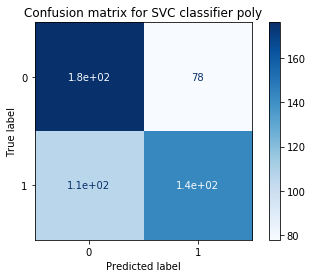

In [52]:
title = 'Confusion matrix for SVC classifier poly'
disp = plot_confusion_matrix(poly,
                             X_test,
                             y_test,
                             display_labels=X_train.columns,
                             cmap=plt.cm.Blues,
                             normalize=None,
                            )
disp.ax_.set_title(title)

Text(0.5, 1.0, 'Confusion matrix for SVC rbf classifier')

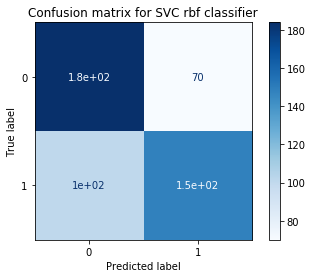

In [53]:
title = 'Confusion matrix for SVC rbf classifier'
disp = plot_confusion_matrix(rbf,
                             X_test,
                             y_test,
                             display_labels=X_train.columns,
                             cmap=plt.cm.Blues,
                             normalize=None,
                            )
disp.ax_.set_title(title)

Text(0.5, 1.0, 'Confusion matrix for SVC linear')

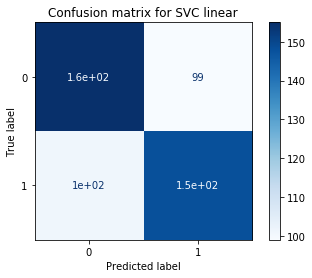

In [55]:
title = 'Confusion matrix for SVC linear'
disp = plot_confusion_matrix(clf,
                             X_test,
                             y_test,
                             display_labels=X_train.columns,
                             cmap=plt.cm.Blues,
                             normalize=None,
                            )
disp.ax_.set_title(title)

# Writeup😿

The **linear  SVC model** training accuracy is **1** while the testing is **0.602**. The** SVC rbf model** trainong accuracy is **0.6884** and the testing **0.660**. The **SVC poly with degree 2** training accuracy is **0.658** while the testing accuarcy is **.634**
______________________________________________________________________________________________________________________________
Among the three SVC we the linear model seems do do perfectly in the training data with a score of 1  followed by the RBF and finally the Ploy==2. However for the testing case the RBF does better followed by Poly=2 and linear comes last. Among the three I would gof for RBf as it has a good testing accuary. However we may not entirely relay on this model metrics measurement until we compare recall and precision among the three.

**VGG16 convolutional neural network**

The loss fuction I selected is Binary Cross-Entropy Loss also called Sigmoid Cross-Entropy loss see here(https://gombru.github.io/2018/05/23/cross_entropy_loss/). This is because we gave each image a label 0 or 1 which is binary.

Constraints: I encountered errors when doing extraction. At one point it would run and when I did rerun it would fail giving the above error

From model mechanisms I would expect VGG16 to perform better given that it was pretrained